In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
np.set_printoptions(suppress = True)

# 第十一章

## 零、练一练

```{admonition} 练一练
事实上，hist函数是有返回值的，只不过在大多数情况下用户并不关心。Python中，常把不需要的返回值赋给“_”变量，此处也正是这样做的。请观察hist的返回值，并尝试说明其含义。
```

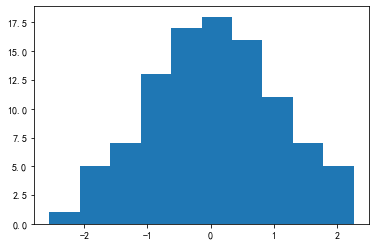

In [2]:
data = np.random.randn(100)
val = plt.hist(data)

第一个返回值是hist分箱结果中每个箱子的样本数量：

In [3]:
val[0]

array([ 1.,  5.,  7., 13., 17., 18., 16., 11.,  7.,  5.])

第二个返回值是分箱的边界值，n个箱子会产生n+1个边界：

In [4]:
val[1]

array([-2.55298982, -2.07071537, -1.58844093, -1.10616648, -0.62389204,
       -0.1416176 ,  0.34065685,  0.82293129,  1.30520574,  1.78748018,
        2.26975462])

第三个返回值是matplotlib中的patches对象

In [5]:
val[2]

<BarContainer object of 10 artists>

```{admonition} 练一练
在上图中，数据值为2的新增样本点没有被判定为异常，请通过计算说明理由。
```

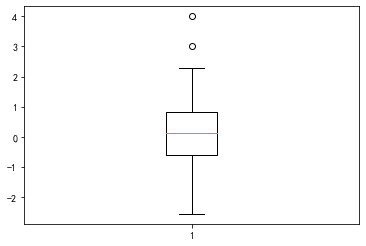

In [6]:
np.random.seed(0)
data = np.random.randn(100)
data = data.tolist() + [2,3,4] # 引入一些较大的值
_ = plt.boxplot(data)

In [7]:
q75 = np.quantile(data, 0.75)
q25 = np.quantile(data, 0.25)
threshold  = q75 + 1.5*(q75 - q25)
data = np.array(data)
data[data <= threshold].max() # 高于2

2.2697546239876076

```{admonition} 练一练
请尝试不同参数的组合，观察plt.plot()的绘图结果。
```

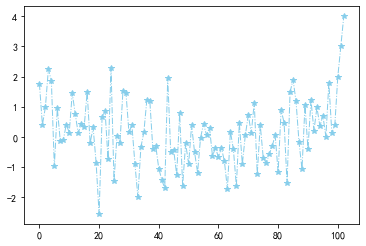

In [8]:
_ = plt.plot(data, linewidth=1.0, color="skyblue", marker="*", linestyle="-.")

```{admonition} 练一练
请对比柱状图和直方图，总结它们之间的区别和联系。
```

直方图一般用于查看连续变量的离散化分布，柱状图一般用于查看离散化变量的频数或频率统计情况。

```{admonition} 练一练
在pie函数中，可以将autopct参数设定为一个单个输入值的函数，其输入值含义是每个类别的占比乘以100，其输出值为字符串。若想在饼图的每一个部分添加占比的数字描述，可以令该参数为lambda p: "%.1f%%"%p，其中%.1f将p保留一位小数，%%表示百分号（%自身在Python格式化字符中需要通过两个%转义）。若现在想要把描述改为“占比 (个数)”的格式，例如当前类别占比5%，共计样本10个，保留2位小数，那么就应当显式为“5.00% (10)”，请利用autopct参数实现。
```

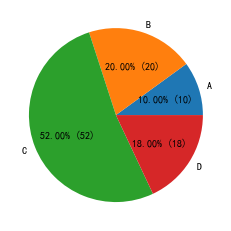

In [9]:
s = pd.Series(np.random.choice(list("ABCD"), size=100, p=[0.1,0.2,0.5,0.2]))
data = s.value_counts().sort_index()
_ = plt.pie(data.values, labels=data.index, autopct=lambda p: "%.2f%% (%d)"%(p,round(p*s.shape[0]/100)))

```{admonition} 练一练
如果上述data是5维的，我们还能通过何种策略来体现第五个维度的数据取值？
```

- 使用scatter图不同的marker
- 使用有边框的圆和没有边框的圆
- 使用不同颜色的映射组（比如浅蓝到深蓝、浅红到深红）
- 使用子图绘制

```{admonition} 练一练
在高维数据中，类别型数据和数值型数据的展示方式是不同的。请分别总结一些相应的展示策略，并构造相应的例子进行绘图。
```

答案因人而异，但需要指出的是，类别型和数据型展示策略的区别在于，前者在图像上的控制参数是离散化的（是否有边框、属于哪个子图、使用哪种marker），而后者在图像上的控制参数是连续的（连续数据本身的取值、marker的size、line的粗细、透明度）。

```{admonition} 练一练
与plt.hist()类似，用户也能通过ax.hist()来进行绘图。先前介绍的基本绘图类型（boxplot、pie、bar等等）是否都能在ax对象上实现？请查阅matplotlib.axes模块对应的api文档，并给出例子说明。
```

可以

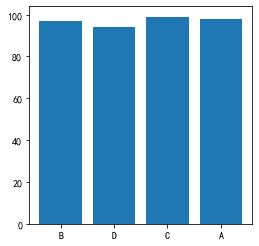

In [10]:
s = pd.Series(np.random.choice(list("ABCD"), size=100, p=[0.1,0.2,0.5,0.2]))
data = s.value_counts().sort_index()
fig, ax = plt.subplots(figsize=(4,4))
_ = ax.bar(s, s.index)

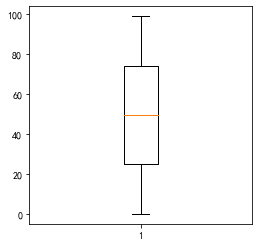

In [11]:
fig, ax = plt.subplots(figsize=(4,4))
_ = ax.boxplot(s.index)

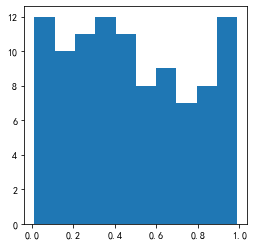

In [12]:
fig, ax = plt.subplots(figsize=(4,4))
_ = ax.hist(np.random.rand(100))

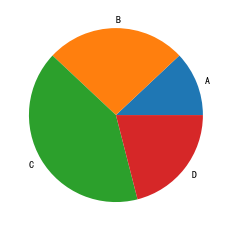

In [13]:
fig, ax = plt.subplots(figsize=(4,4))
_ = ax.pie(data.values, labels=data.index)

```{admonition} 练一练
请多次使用plt.plot作图并添加图例标签进行展示。
```

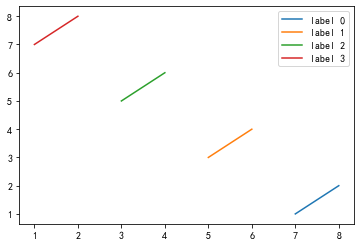

In [14]:
x = [[1,2],[3,4],[5,6],[7,8]][::-1]
y = [[1,2],[3,4],[5,6],[7,8]]
for i in range(4):
    plt.plot(x[i], y[i], label="label %d"%i)
plt.legend()

```{admonition} 练一练
请用手动添加图例的方法来实现plt.hist()例子中自动添加图例的效果。
```

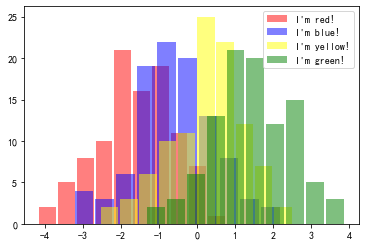

In [15]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
df = pd.concat([
    pd.DataFrame({"num":np.random.randn(100)-1.5, "cat":"A"}),
    pd.DataFrame({"num":np.random.randn(100)-0.5, "cat":"B"}),
    pd.DataFrame({"num":np.random.randn(100)+0.5, "cat":"C"}),
    pd.DataFrame({"num":np.random.randn(100)+1.5, "cat":"D"})
])
c = ["red", "blue", "yellow", "green"]
for i, color in zip(df.cat.unique(), c):
    temp = df.query("cat==@i")
    plt.hist(temp.num, color=color, alpha=0.5, rwidth=0.9)
handles = [
    Patch(edgecolor="None", facecolor="red", alpha=0.5, label="I'm red!"),
    Patch(edgecolor="None", facecolor="blue", alpha=0.5, label="I'm blue!"),
    Patch(edgecolor="None", facecolor="yellow", alpha=0.5, label="I'm yellow!"),
    Patch(edgecolor="None", facecolor="green", alpha=0.5, label="I'm green!")
]
plt.legend(handles=handles)

```{admonition} 练一练
如果把上述代码的plt.axis("off")去除会发生什么？请解释原因。
```

去除后出现了外层的大边框，这是由于plt当前作用于的是这个最大的1*1子图。

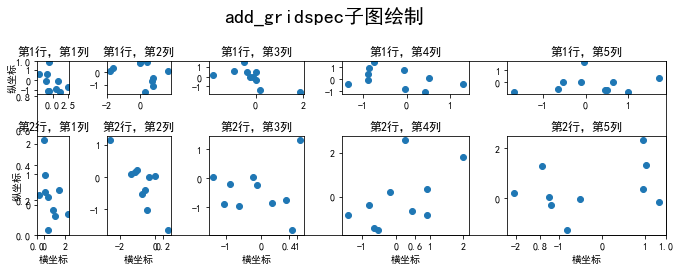

In [16]:
fig, ax = plt.subplots(figsize=(10, 4)) # 只生成1个子图
spec = fig.add_gridspec(nrows=2, ncols=5, width_ratios=[1,2,3,4,5], height_ratios=[1,3])
fig.suptitle('add_gridspec子图绘制', size=20)
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(spec[i, j]) # 子图分配
        ax.scatter(np.random.randn(10), np.random.randn(10))
        ax.set_title('第%d行，第%d列'%(i+1,j+1))
        if i==1: ax.set_xlabel('横坐标')
        if j==0: ax.set_ylabel('纵坐标')
fig.tight_layout()

```{admonition} 练一练
请在心脏病的数据集中选取若干特征按照上述统计量进行定量分析。
```

略

```{admonition} 练一练
请用上述公式，核对pandas中skew()和kurt()的计算结果。
```

In [17]:
s = pd.Series(np.log(np.random.rand(100)**2))
c = s - s.mean()
n = s.shape[0]

In [18]:
skew = n*n/(n-1)/(n-2)*(c**3).mean()/((c**2).sum()/(n-1))**1.5
skew, s.skew()

(-1.6596070898924549, -1.6596070898924546)

In [19]:
kurt = (n+1)*n*(n-1)/(n-2)/(n-3)*(c**4).sum()/(c**2).sum()**2-3*(n-1)*(n-1)/(n-2)/(n-3)
kurt, s.kurt()

(3.3497831270308462, 3.3497831270308445)

```{admonition} 练一练
请在心脏病数据集中分别选取数值型-数值型、数值型-类别型、类别型-类别型3种组合的2维变量，利用不同的可视化方法进行观测。
```

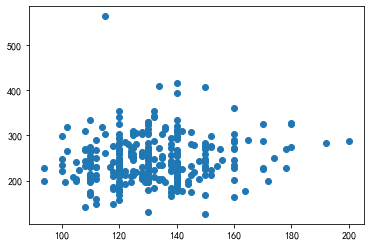

In [20]:
df = pd.read_csv("data/ch11/heart.csv")
plt.scatter(df.trestbps, df.chol)

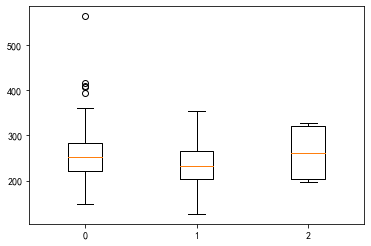

In [21]:
labels = df.restecg.unique()
_ = plt.boxplot([df.loc[df.restecg==i, "chol"].tolist() for i in labels], labels=labels)

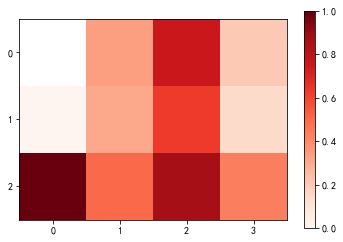

In [22]:
res = df.pivot_table(index="slope", columns="thal", values="target", aggfunc="mean")
res.index = res.index.astype("string")
res.columns = res.columns.astype("string")
plt.xticks(range(res.columns.nunique()))
plt.yticks(range(res.index.nunique()))
plt.imshow(res, cmap="Reds")
plt.colorbar()

```{admonition} 练一练
pandas-profiling能够方便地汇总数据信息，但它仍然是不够全面的。请问本文提到的数据观测流程中，哪些环节或方法是pandas-profiling包没有涉及的？
```

包括但不限于：原生类型和业务类型的精确判断、多个变量关系在同一张图上呈现、针对目标变量的边际分析


## 一、图片绘制

利用matplotlib完成以下画图问题：

- 现有1份墨尔本温度的数据集data/ch11/temperature.csv，请仿照图11.38的效果进行绘制。

```{figure} ../source/_static/ch11/11-38.png
---
width: 700px
align: center
---
图11.38 墨尔本温度示例图
```

- 用np.random.randn(2, 150)生成1组2维数据，做出该数据对应的散点图和边际分布图，效果应如图11.39所示。

```{figure} ../source/_static/ch11/11-39.png
---
width: 300px
align: center
---
图11.39 正态散点和边际图
```

```{hint}
图11.39中最上方的边际分布图是指第一行数据的直方图，最左侧的边际分布图是指第二行数据的直方图。
```

- 蒙德里安（Piet Cornelies Mondrian）是几何抽象画派的代表人物，图11.40是他某一件作品的局部，请用matplotlib绘制。

```{figure} ../source/_static/ch11/11-40.png
---
width: 250px
align: center
---
图11.40 蒙德里安的某一幅画
```

- 某西瓜基地共有10个大棚，工作人员想要对每个大棚的西瓜总产量进行可视化，最终效果如图11.41所示。每个大棚的地理轮廓信息（每行记录为轮廓对应多边形的顶点坐标序列$x_1,y_1,x_2,x_2,...$）保存在了data/ch11/field.txt中，相应西瓜的生产记录表（包含产地坐标以及当次记录的产量output）保存在了data/ch11/watermelon.csv中。请结合本章知识和给定的数据，模仿图11.41进行绘制。

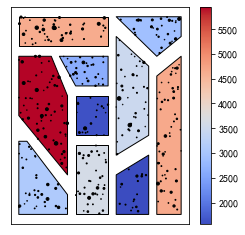

In [23]:
from matplotlib.path import Path
from matplotlib.collections import PolyCollection
np.random.seed(0)
points = np.array([[1,2], [2.5,2.5], [2,1], [1,1]])
p1 = [[10,0], [10,8], [8.5, 7], [8.5,0]]
p2 = [[6,0], [6,2], [8,3], [8,0]]
p3 = [[6,10], [10,10], [10,9], [8.5,8]]
p4 = [[6,3], [6,9], [8,7.5], [8,4]]
p5 = [[0,0], [0,3.7], [0.5,3.7], [3,1], [3,0]]
p6 = [[0,5], [0,8], [2,8], [3,6], [3,2]]
p7 = [[0,10], [5.5,10], [5.5,8.5], [0,8.5]]
p8 = [[2.5,8], [3.5,6.5], [5.5,6.5], [5.5,8]]
p9 = [[3.5,4],[5.5,4],[5.5,6],[3.5,6]]
p10 = [[3.5,0],[5.5,0],[5.5,3.5],[3.5,3.5]]
fig, ax = plt.subplots(figsize=(4,4))
val = np.round(np.sqrt(np.random.randn(500) ** 2) * 50 + 50)
x = np.random.uniform(0, 10, 500)
y = np.random.uniform(0, 10, 500)
p = Path(p1)
mask = p.contains_points(np.stack([x, y], -1))
for p in [p2,p3,p4,p5,p6,p7,p8,p9,p10]:
    p = Path(p)
    mask = mask | p.contains_points(np.stack([x, y], -1))
val, x, y = val[mask], x[mask], y[mask]
L = []
for p in [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]:
    mask = Path(p).contains_points(np.stack([x, y], -1))
    L.append(val[mask].sum())
poly_collections = PolyCollection([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10], array=L, cmap="coolwarm", edgecolors='black')
plt.colorbar(poly_collections, ax=ax)
ax.add_collection(poly_collections)
plt.scatter(x, y, s=val**3/500000, c="black")
ax.set_xlim(-.5,10.5)
ax.set_ylim(-.5,10.5)
ax.set_xticks([])
ax.set_yticks([])
with open("data/ch11/field.txt", "w") as f:
    for p in [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]:
        for item in p:
            i, j = tuple(item)
            f.write(str(i))
            f.write(" ")
            f.write(str(j))
            f.write(" ")
        f.write("\n")
pd.DataFrame({"x":x,"y":y,"output":val}).to_csv("data/ch11/watermelon.csv",index=False)
plt.savefig("_static/ch11/11-41.svg")

```{figure} ../source/_static/ch11/11-41.svg
---
width: 300px
align: center
---
图11.41 西瓜种植基地中各大棚总产量可视化结果
```

```text
【解答】
```

- 1

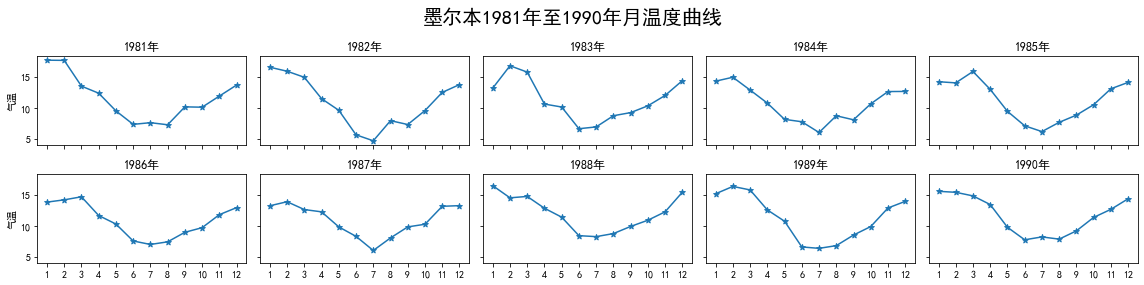

In [24]:
fig, axs = plt.subplots(2, 5, figsize=(16, 4),sharey=True, sharex=True)
fig.suptitle('墨尔本1981年至1990年月温度曲线', size=20)
df = pd.read_csv("data/ch11/temperature.csv")
data = df.Temperature.values.reshape(10,12)
time = [[str(j) for j in list(range(1,13))] for i in range(10)]
year = list(range(1981,1991))
for i in range(2):
    for j in range(5):
        axs[i][j].plot(time[5*i+j],data[5*i+j])
        axs[i][j].scatter(time[5*i+j],data[5*i+j],marker='*')
        axs[i][j].set_title(str(year[5*i+j])+'年')
        if j==0: axs[i][j].set_ylabel('气温')
fig.tight_layout()

- 2

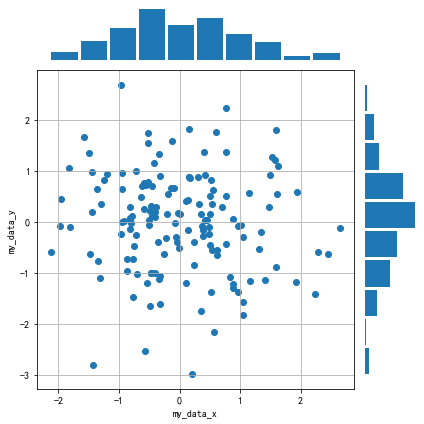

In [25]:
#方法一：利用2*2布局

data = np.random.randn(2, 150)
fig = plt.figure(figsize=(6, 6))
spec = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[6,1], height_ratios=[1,6])
ax = fig.add_subplot(spec[0, 0])
ax.axis('off')
ax.hist(data[0], rwidth=0.9)
ax = fig.add_subplot(spec[1, 0])
ax.scatter(data[0], data[1])
ax.set_ylabel('my_data_y')
ax.set_xlabel('my_data_x')
ax.grid()
ax = fig.add_subplot(spec[1, 1])
ax.hist(data[1], orientation = 'horizontal', rwidth=0.9)
ax.axis('off')
fig.tight_layout()

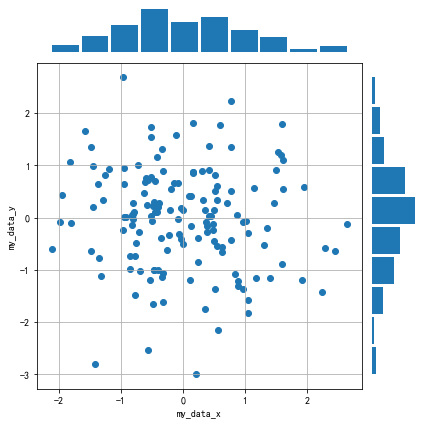

In [26]:
#方法二：利用7*7布局

fig = plt.figure(figsize=(6, 6))
spec = fig.add_gridspec(nrows=7, ncols=7)
ax = fig.add_subplot(spec[0, :6])
ax.axis('off')
ax.hist(data[0], rwidth=0.9)
ax = fig.add_subplot(spec[1:, :6])
ax.scatter(data[0], data[1])
ax.set_ylabel('my_data_y')
ax.set_xlabel('my_data_x')
ax.grid()
ax = fig.add_subplot(spec[1:, 6])
ax.hist(data[1], orientation = 'horizontal', rwidth=0.9)
ax.axis('off')
fig.tight_layout()

- 3

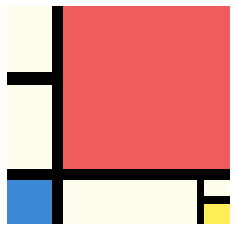

In [27]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))
patch = Rectangle((0,0),1,1,facecolor='black')
ax.axis("off")
ax.add_patch(patch)
ax.add_patch(Rectangle((0,0.7),0.2,0.3,facecolor='#FFFEEE'))
ax.add_patch(Rectangle((0,0.25),0.2,0.39,facecolor='#FFFEEE'))
ax.add_patch(Rectangle((0.25,0),0.6,0.2,facecolor='#FFFEEE'))
ax.add_patch(Rectangle((0.88,0.13),0.12,0.07,facecolor='#FFFEEE'))
ax.add_patch(Rectangle((0.88,0),0.12,0.09,facecolor='#FFEE58'))
ax.add_patch(Rectangle((0.88,0),0.12,0.09,facecolor='#FFEE58'))
ax.add_patch(Rectangle((0,0),0.20,0.2,facecolor='#3C88D4'))
ax.add_patch(Rectangle((0.25,0.25),0.75,0.75,facecolor='#EE5C5C'))

- 4

[]

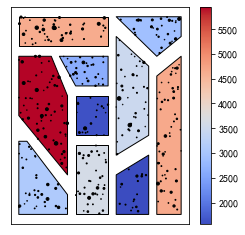

In [28]:
from matplotlib.path import Path
from matplotlib.collections import PolyCollection
fig, ax = plt.subplots(figsize=(4,4))
with open("data/ch11/field.txt") as f:
    points = [i.split() for i in f.readlines()]
    points = [list(zip(i[0::2], i[1::2])) for i in points]
L = []
for p in points:
    mask = Path(p).contains_points(np.stack([x, y], -1))
    L.append(val[mask].sum())
poly_collections = PolyCollection(
    points,
    array=L,
    cmap="coolwarm",
    edgecolors='black',
)
plt.colorbar(poly_collections, ax=ax)
ax.add_collection(poly_collections)
plt.scatter(x, y, s=val**3/500000, c="black")
ax.set_xlim(-.5,10.5)
ax.set_ylim(-.5,10.5)
ax.set_xticks([])
ax.set_yticks([])

## 二、数据观测实战

请用本章所学的各种数据观测方法，对如下的2个数据集进行观测分析：

- 空气污染数据集：data/ch11/pollution.csv
- 地震记录数据集：data/ch11/earthquake.csv

```text
【解答】
```

略

## 三、基于PyOD库的异常检测

异常检测是一种特殊的数据分布度量，它是数据科学领域的重要研究课题之一。PyOD是一个专注于异常检测的Python库，目前已经内置实现了30多种异常检测算法，其项目文档的地址是https://pyod.readthedocs.io/en/latest/，我们可以通过pip安装：

```bash
pip install pyod
```

我们首先使用PyOD的内置数据生成器来生成1组含有异常的数据，如图11.42所示：

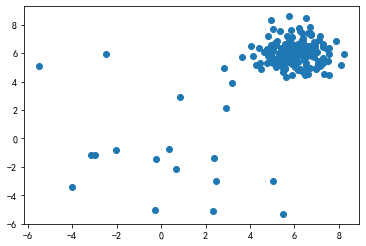

In [29]:
from pyod.utils.data import generate_data
# contamination表示异常比例
# behavior设为new表示返回的顺序为先X后y
X_train, X_test, y_train, y_test = generate_data(
    n_train=200, n_test=100, n_features=2,
    contamination=0.1, behaviour="new", random_state=42)
plt.scatter(X_train[:,0], X_train[:,1])

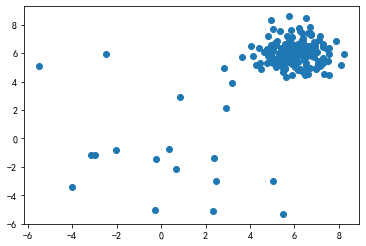

In [30]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.savefig("_static/ch11/11-42.svg")

```{figure} ../source/_static/ch11/11-42.svg
---
width: 300px
align: center
---
图11.42 模拟生成的含异常样本数据
```

PyOD的使用非常便利，我们只要导入模型后使用fit()函数进行训练，利用clf.labels_和predict()函数就能分别得到训练集的模型判断结果和测试集的模型判断结果，若为1则异常。此处，我们使用基于KNN的异常检测模型进行演示：

In [31]:
from pyod.models.knn import KNN
clf = KNN()
clf.fit(X_train)
y_train_pred = clf.labels_ # 训练集预测标签
y_test_pred = clf.predict(X_test) # 测试集预测标签
y_test_pred.mean() # 测试集中预测为异常的约有12%

0.12

```{hint}
clf.decision_scores_、clf.decision_function(X_test)和clf.predict_proba(X_test)能够分别得到训练集的样本异常得分、测试集的样本异常得分以及训练集的样本异常概率。
```

在官网的案例中给出了图11.43中所示的模型结果，它也基于上述的KNN异常检测模型，并且所使用数据集的构造方式与我们完全一致。图11.43的构成如下：左上角为训练集中真实的异常值和非异常值，右上角为训练集中预测的异常值和非异常值，左下角为测试集中真实的异常值和非异常值，右下角为测试集中预测的异常值和非异常值。请利用PyOD中的COPOD模型，仿照图11.43的布局画出类似的实验结果图。

```{figure} ../source/_static/ch11/11-43.png
---
width: 600px
align: center
---
图11.43 基于KNN的检测结果
```

```text
【解答】
```

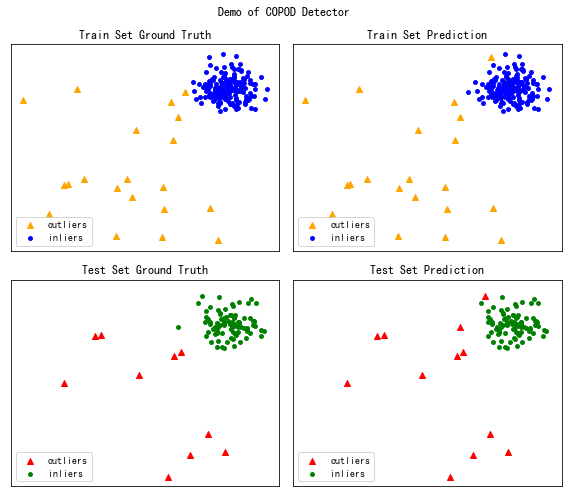

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(8,7), sharex=True, sharey=True)
fig.suptitle('Demo of COPOD Detector')
#00
axs[0][0].scatter(
    X_train[y_train==1, 0], X_train[y_train==1, 1],
    label="outliers", marker="^", c="orange")
axs[0][0].scatter(
    X_train[y_train==0, 0], X_train[y_train==0, 1],
    label="inliers", marker="o", c="blue", s=15)
axs[0][0].set_title("Train Set Ground Truth")
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
axs[0][0].legend(loc=3)
#01
axs[0][1].scatter(
    X_train[y_train_pred==1, 0], X_train[y_train_pred==1, 1],
    label="outliers", marker="^", c="orange")
axs[0][1].scatter(
    X_train[y_train_pred==0, 0], X_train[y_train_pred==0, 1],
    label="inliers", marker="o", c="blue", s=15)
axs[0][1].set_title("Train Set Prediction")
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].legend(loc=3)
#10
axs[1][0].scatter(
    X_test[y_test==1, 0], X_test[y_test==1, 1],
    label="outliers", marker="^", c="red")
axs[1][0].scatter(
    X_test[y_test==0, 0], X_test[y_test==0, 1],
    label="inliers", marker="o", c="green", s=15)
axs[1][0].set_title("Test Set Ground Truth")
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])
axs[1][0].legend(loc=3)
#11
axs[1][1].scatter(
    X_test[y_test_pred==1, 0], X_test[y_test_pred==1, 1],
    label="outliers", marker="^", c="red")
axs[1][1].scatter(
    X_test[y_test_pred==0, 0], X_test[y_test_pred==0, 1],
    label="inliers", marker="o", c="green", s=15)
axs[1][1].set_title("Test Set Prediction")
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].legend(loc=3)
fig.tight_layout() # 调整子图的相对大小使字符不会重叠